In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy

In [54]:
cross_file = '20201125_cross.csv'

In [55]:
# load data

cross = pd.read_csv(cross_file, low_memory=False)
cross = cross.drop([0,1])
cross = cross.reset_index()

cross = cross.replace('AA', -1)
cross = cross.replace('AB', 0)
cross = cross.replace('BB', 1)
cross = cross.replace('-', np.nan)

cross.GENERATION = ['F'+str(i) for i in cross.GENERATION]
cross.DAM = ['D'+str(i) for i in cross.DAM]

cross = cross.loc[cross.BW8.isna()==False]
cross.BW8 = cross.BW8.astype(float)
cross.SEX = cross.SEX.astype(float)


cnew = []
for i in cross.columns:
    if '-' in i:
        ni = 'mrk_'+'_'.join(i.split('-'))
    else:
        ni = i
    cnew.append(ni)
    
cross.columns = cnew

cross_markers = [i for i in cross.columns if i.startswith('mrk')]


In [56]:
#cross

In [57]:
precorrected_phe = pd.read_csv('20201125_residuals_precorrected_for_sex_and_generation.csv')

In [58]:
cross_noF8 =copy.deepcopy(cross.loc[cross['GENERATION']!='F8'])
cross_F8 =copy.deepcopy(cross.loc[cross['GENERATION']=='F8'])
cross_F2 =copy.deepcopy(cross.loc[cross['GENERATION']=='F2'])
cross_F15 =copy.deepcopy(cross.loc[cross['GENERATION']=='F15'])

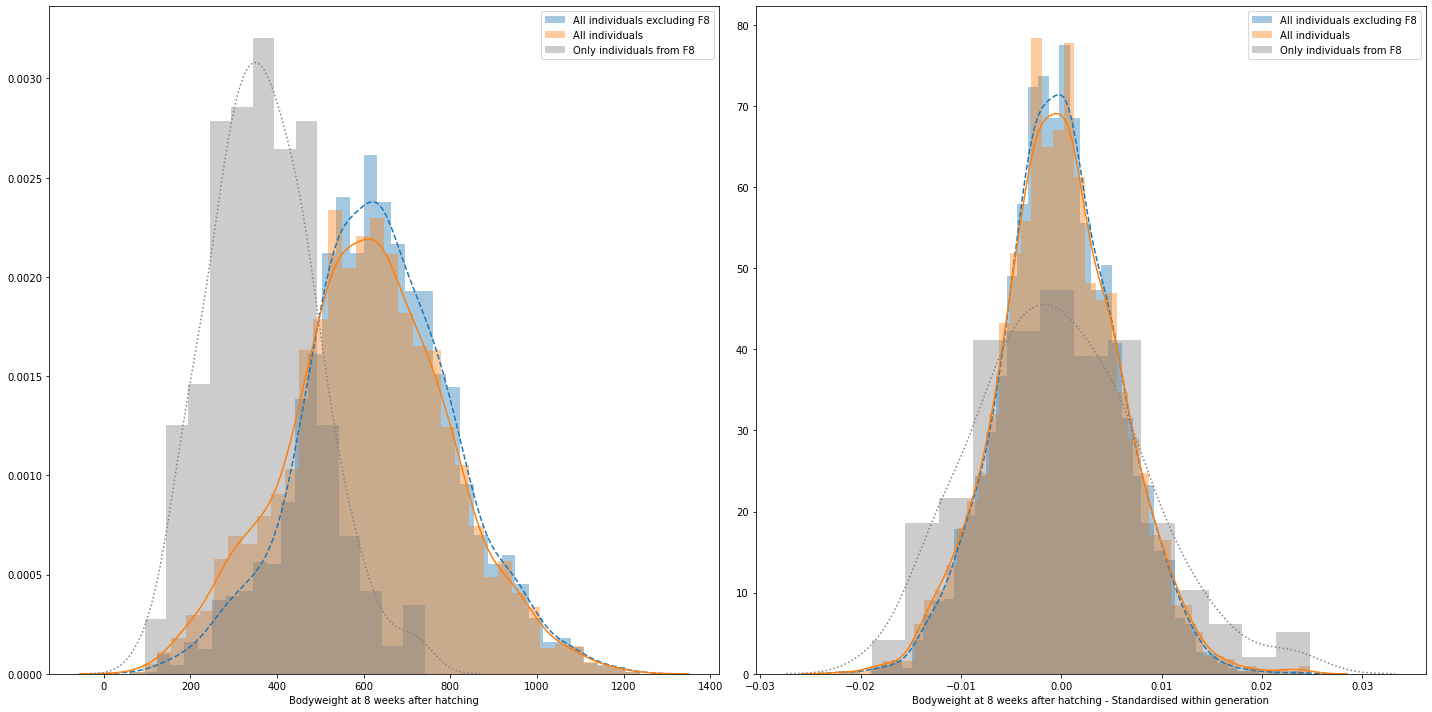

In [59]:
fig, (ax, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

sns.distplot(cross_noF8['BW8'], label='All individuals excluding F8', ax=ax, kde_kws={'linestyle':'--'})
sns.distplot(cross['BW8'], label='All individuals', ax=ax, )
sns.distplot(cross_F8['BW8'], label='Only individuals from F8', ax=ax, color='grey',kde_kws={'linestyle':':'})
ax.legend()
ax.set_xlabel('Bodyweight at 8 weeks after hatching')


sns.distplot(cross_noF8['BW8_norm_by_gen'], label='All individuals excluding F8', ax=ax1, kde_kws={'linestyle':'--'})
sns.distplot(cross['BW8_norm_by_gen'], label='All individuals', ax=ax1, )
sns.distplot(cross_F8['BW8_norm_by_gen'], label='Only individuals from F8', ax=ax1, color='grey',kde_kws={'linestyle':':'})

ax1.set_xlabel('Bodyweight at 8 weeks after hatching - Standardised within generation')
ax1.legend()
plt.tight_layout()
plt.savefig('20201209_BW8_BWnorm_dist.png')
plt.show()







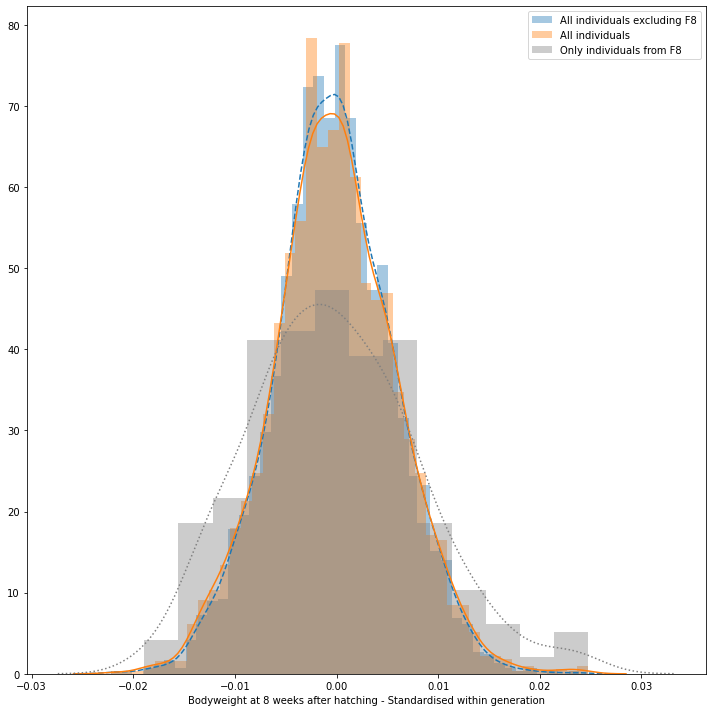

In [60]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

sns.distplot(cross_noF8['BW8_norm_by_gen'], label='All individuals excluding F8', ax=ax, kde_kws={'linestyle':'--'})
sns.distplot(cross['BW8_norm_by_gen'], label='All individuals', ax=ax, )
sns.distplot(cross_F8['BW8_norm_by_gen'], label='Only individuals from F8', ax=ax, color='grey',kde_kws={'linestyle':':'})

ax.set_xlabel('Bodyweight at 8 weeks after hatching - Standardised within generation')
plt.tight_layout()
plt.legend()
plt.show()

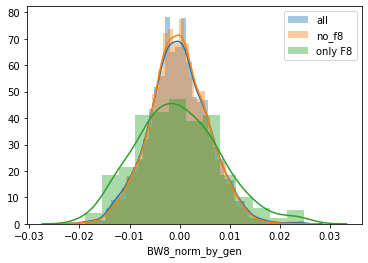

In [61]:
sns.distplot(cross['BW8_norm_by_gen'], label='all')
sns.distplot(cross_noF8['BW8_norm_by_gen'], label = 'no_f8')
sns.distplot(cross_F8['BW8_norm_by_gen'], label='only F8')
plt.legend()
plt.show()

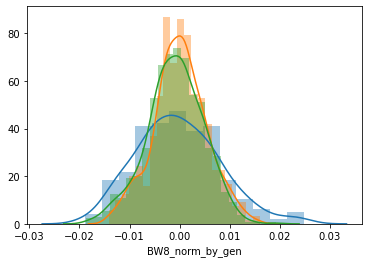

In [62]:
#sns.distplot(cross['BW8_norm_by_gen'])
#sns.distplot(cross_noF8['BW8_norm_by_gen'])
sns.distplot(cross_F8['BW8_norm_by_gen'])
sns.distplot(cross_F2['BW8_norm_by_gen'])
sns.distplot(cross_F15['BW8_norm_by_gen'])

plt.show()

In [63]:
len(cross_F8)

289

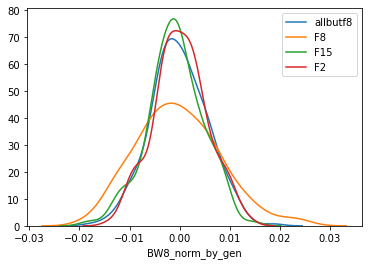

In [64]:
sns.distplot(np.random.choice(cross_noF8['BW8_norm_by_gen'],289),label='allbutf8', hist=False)
sns.distplot(cross_F8['BW8_norm_by_gen'], label = 'F8', hist=False)
sns.distplot(np.random.choice(cross_F15['BW8_norm_by_gen'],289), label = 'F15', hist=False)
sns.distplot(np.random.choice(cross_F2['BW8_norm_by_gen'],289), label= 'F2', hist=False,)

plt.show()

In [65]:
precorrected_phe['GENERATION'] = ['F_'+str(i)[-2:] for i in precorrected_phe.id]

In [66]:
precorr_F8 = precorrected_phe.loc[precorrected_phe['GENERATION']=='F_08']

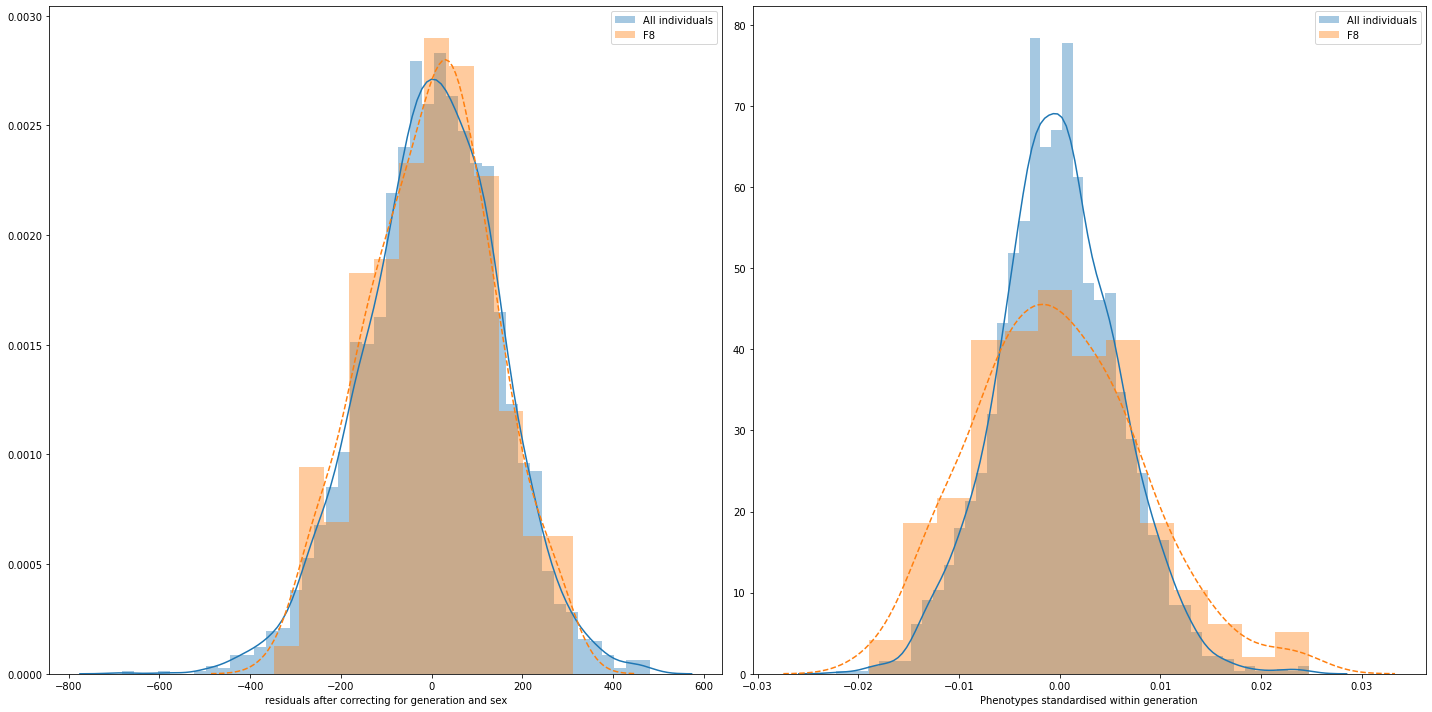

In [67]:
fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

sns.distplot(precorrected_phe['sex_gen_resid'], ax=ax, label='All individuals')
sns.distplot(precorr_F8['sex_gen_resid'], ax=ax, label='F8',kde_kws={'linestyle':'--'})
ax.legend()

sns.distplot(cross['BW8_norm_by_gen'], ax=ax2,label='All individuals')
sns.distplot(cross_F8['BW8_norm_by_gen'], ax=ax2, label='F8',kde_kws={'linestyle':'--'})
ax2.legend()
ax.set_xlabel('residuals after correcting for generation and sex')
ax2.set_xlabel('Phenotypes standardised within generation')

plt.tight_layout()
plt.savefig('20201209_resid_vs_normbw_with_or_without_f8.png')
plt.show()







# load effectsizes

In [68]:
# first, we gotta format these suckers right
! sed -i'.bak' 's:  : :g' 20201204_estimated_effects_nof8_normbw8.tsv # run this sucker a couple times to get rid of the unneccesary spaces

In [69]:
normbw8_effectsizes_nof8 = pd.read_csv('20201204_estimated_effects_nof8_normbw8.tsv', sep=' ')

In [70]:
! sed -i'.bak' 's:  : :g' 20201204_estimated_effects_normbw8.tsv

In [71]:
normbw8_effectsizes = pd.read_csv('20201204_estimated_effects_normbw8.tsv', sep=' ')

In [72]:
normbw8_effectsizes.columns = ['x', 'est', 'SE', 't']

In [73]:
normbw8_effectsizes_nof8.columns = ['x', 'est', 'SE', 't']

In [146]:
normbw8_effectsizes_only_add = pd.DataFrame([ k for i,k in normbw8_effectsizes.iterrows() if k['x'].endswith('a')])

In [147]:
normbw8_effectsizes_nof8_only_add = pd.DataFrame([ k for i,k in normbw8_effectsizes_nof8.iterrows() if k['x'].endswith('a')])

In [81]:
#normbw8_effectsizes_only_add

In [80]:
#normbw8_effectsizes_nof8_only_add

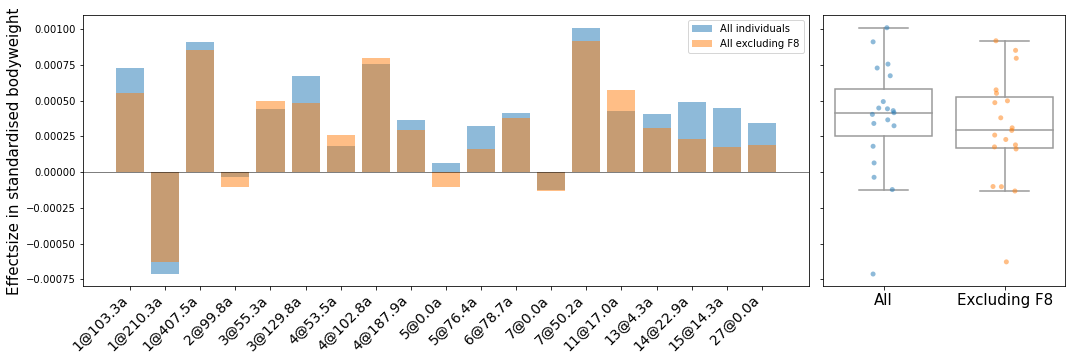

In [183]:
fig, (ax,ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15,5),gridspec_kw={'width_ratios': [3, 1]}, sharey=True)

ax.bar(range(len(normbw8_effectsizes_only_add)), normbw8_effectsizes_only_add['est'], alpha=0.5, label='All individuals')
ax.bar(range(len(normbw8_effectsizes_only_add)), normbw8_effectsizes_nof8_only_add['est'], alpha=0.5, label='All excluding F8')
ax.set_xticks(range(len(normbw8_effectsizes_only_add)))
ax.set_xticklabels(normbw8_effectsizes_only_add['x'], rotation=45, ha='right', size=14)

ax.set_ylabel('Effectsize in standardised bodyweight', size=15)
ax.axhline(0, color='Black', lw=0.5)
sns.boxplot(data=both, y='est',x='orig', fliersize=0, saturation=1, color='White', ax=ax1)
sns.stripplot(data=both, y='est',x='orig', ax=ax1, alpha=0.5)
ax1.set_xticklabels(["All", "Excluding F8"], size=15)
ax1.set_xlabel('')
ax1.set_ylabel('')


plt.tight_layout()
ax.legend()
plt.show()

In [128]:
normbw8_effectsizes_nof8_only_add

,x,est,SE,t,orig
2,1@103.3a,0.000550,0.000144,3.821,nof8
4,1@210.3a,-0.000628,0.000147,-4.277,nof8
6,1@407.5a,0.000851,0.000147,5.777,nof8
8,2@99.8a,-0.000102,0.000140,-0.730,nof8
10,3@55.3a,0.000498,0.000148,3.372,nof8
12,3@129.8a,0.000485,0.000147,3.293,nof8
14,4@53.5a,0.000258,0.000162,1.592,nof8
16,4@102.8a,0.000795,0.000159,5.009,nof8
18,4@187.9a,0.000291,0.000139,2.091,nof8
20,5@0.0a,-0.000101,0.000128,-0.789,nof8


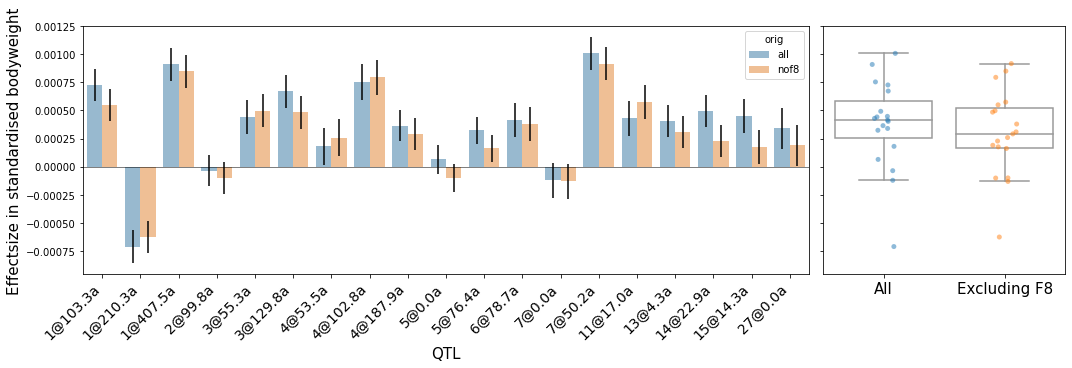

In [187]:
fig, (ax,ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15,5),gridspec_kw={'width_ratios': [3, 1]}, sharey=True)

sns.barplot(x='x', y='est', data=both, yerr=normbw8_effectsizes_nof8_only_add['SE'], hue='orig', alpha=0.5, ax=ax)


ax.set_xticks(range(len(normbw8_effectsizes_only_add)))
ax.set_xticklabels(normbw8_effectsizes_only_add['x'], rotation=45, ha='right', size=14)
ax.set_xlabel('QTL', size=15)

ax.set_ylabel('Effectsize in standardised bodyweight', size=15)
ax.axhline(0, color='Black', lw=0.5)
sns.boxplot(data=both, y='est',x='orig',fliersize=0,saturation=0.5,color='White', ax=ax1)
sns.stripplot(data=both, y='est',x='orig', ax=ax1, alpha=0.5)
ax1.set_xticklabels(["All", "Excluding F8"], size=15)
ax1.set_xlabel('')
ax1.set_ylabel('')


plt.tight_layout()

plt.savefig('20201209_add_effectsize_normbw8_with_without_F8.png')
plt.show()

In [148]:
normbw8_effectsizes_only_add['orig'] = ['all' for i,k in normbw8_effectsizes_only_add.iterrows()]

normbw8_effectsizes_nof8_only_add['orig'] = [ 'nof8' for i,k in normbw8_effectsizes_only_add.iterrows()]

both = pd.merge(normbw8_effectsizes_only_add,normbw8_effectsizes_nof8_only_add, right_index=True, left_index=True, suffixes=['_all', '_nof8'] )

In [149]:
both = normbw8_effectsizes_only_add.append(normbw8_effectsizes_nof8_only_add).reset_index()

In [151]:
both

,index,x,est,SE,t,orig
0,2,1@103.3a,0.000727,0.000147,4.965,all
1,4,1@210.3a,-0.000713,0.000148,-4.824,all
2,6,1@407.5a,0.000910,0.000149,6.110,all
3,8,2@99.8a,-0.000037,0.000143,-0.257,all
4,10,3@55.3a,0.000442,0.000150,2.937,all
5,12,3@129.8a,0.000673,0.000146,4.597,all
6,14,4@53.5a,0.000180,0.000163,1.104,all
7,16,4@102.8a,0.000755,0.000157,4.814,all
8,18,4@187.9a,0.000365,0.000140,2.603,all
9,20,5@0.0a,0.000064,0.000129,0.494,all


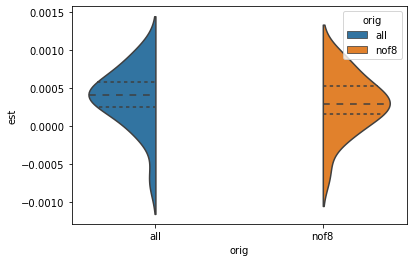

In [199]:
sns.violinplot(data=both,x='orig', y='est',inner='quartile', hue='orig',split=True)
plt.show()

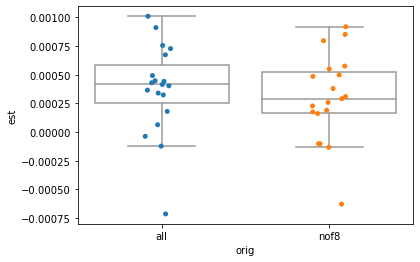

In [88]:
sns.boxplot(data=both, y='est',x='orig', fliersize=0, saturation=1, color='White')
sns.stripplot(data=both, y='est',x='orig')

plt.show()